In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [6]:
test = get_quandl_data

In [13]:
# test.head()

In [8]:
btc_usd_price_dash = get_quandl_data('BTER/DASHBTC')

Loaded BTER/DASHBTC from cache


In [9]:
btc_usd_price_dash.head()

,High,Low,Last,Average,Sell,Buy,Volume (DASH),Volume (BTC)
Date,,,,,,,,
2015-03-25,0.02500,0.01952,0.02100,0.02253,0.02149,0.02100,5089.27,114.6656
2015-03-26,0.02242,0.01880,0.02084,0.02116,0.02086,0.02019,2730.90,57.7865
2015-03-27,0.02063,0.01730,0.01893,0.01944,0.01952,0.01916,552.75,10.7449
2015-03-28,0.01989,0.01851,0.01927,0.01937,0.01930,0.01927,975.75,18.9027
2015-03-29,0.01987,0.01854,0.01881,0.01911,0.01881,0.01855,1136.94,21.7248


In [10]:
btc_usd_price_dash.columns

Index(['High', 'Low', 'Last', 'Average', 'Sell', 'Buy', 'Volume (DASH)',
       'Volume (BTC)'],
      dtype='object')

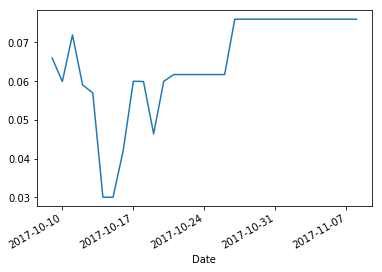

In [11]:
btc_usd_price_dash['High'].tail(30).plot()

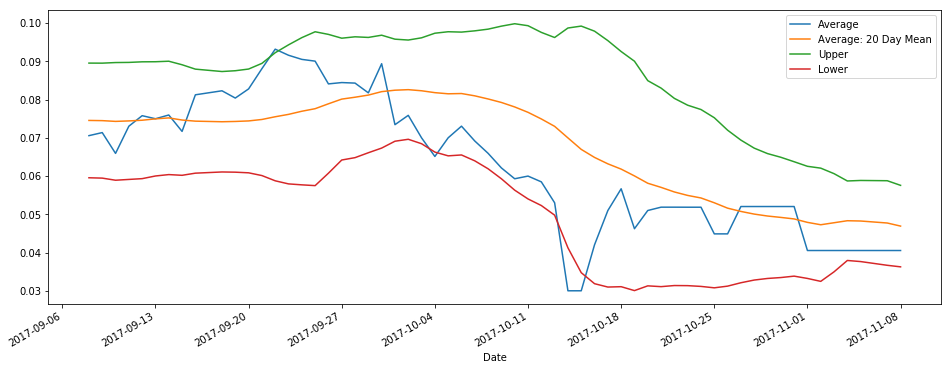

In [12]:
#Bollinger bands
#create 3 columns
# Close 20 MA
btc_usd_price_dash['Average: 20 Day Mean'] = btc_usd_price_dash['Average'].rolling(20).mean()
#Upper = 20MA + 2*std(20)
btc_usd_price_dash['Upper'] = btc_usd_price_dash['Average: 20 Day Mean'] + 2*(btc_usd_price_dash['Average'].rolling(20).std())
#Lower = 20MA - 2*std(20)
btc_usd_price_dash['Lower'] = btc_usd_price_dash['Average: 20 Day Mean'] - 2*(btc_usd_price_dash['Average'].rolling(20).std())

btc_usd_price_dash[['Average','Average: 20 Day Mean','Upper','Lower']].tail(60).plot(figsize=(16,6))

In [ ]:
btc_usd_price_dash[['Average','Average: 20 Day Mean','Upper','Lower']].tail(365).plot(figsize=(16,6))